<a href="https://www.kaggle.com/code/evelynartoria/fruit-object-detection-pytorch-yolov5?scriptVersionId=187163087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import glob
import torch
import PIL
import matplotlib.pyplot as plt

In [3]:
test_images = glob.glob("/kaggle/input/fruit-images-for-object-detection/test_zip/test/*.jpg")
sample = test_images[19]
print(sample)

/kaggle/input/fruit-images-for-object-detection/test_zip/test/banana_77.jpg


In [4]:
model = torch.hub.load(repo_or_dir="ultralytics/yolov5", model="yolov5x", pretrained=True)

/opt/conda/lib/python3.10/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 19.0 MB/s eta 0:00:00
requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0

requirements: AutoUpdate success ✅ 17.6s, installed 1 package: ['pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-7-7 Python-3.10.13 torch-2.1.2+cpu CPU

100%|██████████| 166M/166M [00:00<00:00, 233MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


In [5]:
def random_image_inference(model, images_paths):
    x = torch.randint(0, len(images_paths), (1,)).item()
    sample = [images_paths[x]]
    
    model.eval()
    with torch.inference_mode():
        results = model(sample)
        results.show()

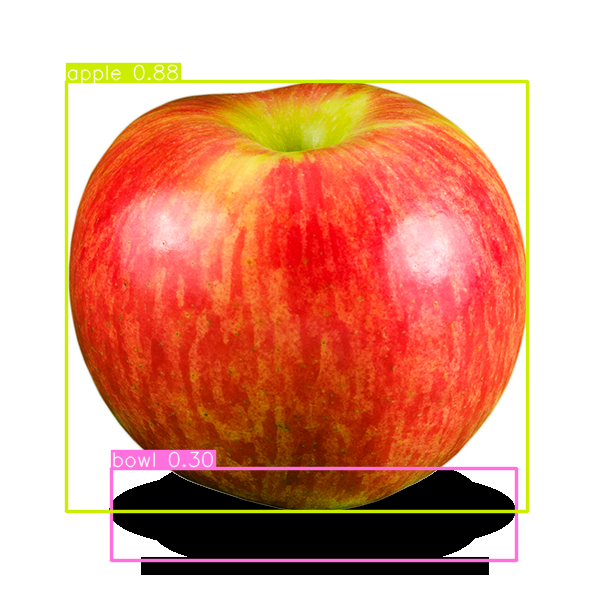

In [6]:
random_image_inference(model=model, images_paths=glob.glob("/kaggle/input/fruit-images-for-object-detection/test_zip/test/*.jpg"))